In [1]:
from dec.chebyshev import H0d_cheb, H0_cheb, H1_cheb, H1d_cheb
from dec.helper import to_matrix
import dec.spectral as sp
import numpy as np

In [2]:
def H0_cheb(f):
    '''
    >>> sp.to_matrix(H0_cheb, 2)
    array([[ 0.75,  0.25],
           [ 0.25,  0.75]])
    '''
    f = sp.mirror0(f, +1)
    N = f.shape[0]; h = 2*np.pi/N
    f = sp.F(f)
    f = sp.fourier_K(f, 0, h/2)
    f = sp.Finv(f)
    f = sp.fold0(f, -1)
    return np.real(f)

In [3]:
to_matrix(H0_cheb, 3)

array([[ 0.2327411 ,  0.07741102, -0.0172589 ],
       [ 0.11785113,  1.1785113 ,  0.11785113],
       [-0.0172589 ,  0.07741102,  0.2327411 ]])

In [4]:
def H0_cheb_new(f):
    f = sp.mirror0(f, +1)
    N = f.shape[0]; h = 2*np.pi/N
    f = sp.F(f)
    f = sp.fourier_K(f, -h/2, h/2)
    f = sp.Finv(f)
    f = sp.unmirror0(f)
    return np.real(f)

In [5]:
to_matrix(H0_cheb_new, 3)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.11785113,  1.1785113 ,  0.11785113],
       [ 0.        ,  0.        ,  0.        ]])

In [7]:
N = 500
x = np.random.rand(N)
M = to_matrix(H0d_cheb, N)

%timeit to_matrix(H0d_cheb, N)

%timeit M.dot(x)
%timeit H0d_cheb(x)

%timeit H1_cheb(x)
%timeit H0_cheb(x)
%timeit H1d_cheb(x)

1 loops, best of 3: 390 ms per loop
1000 loops, best of 3: 254 µs per loop
1000 loops, best of 3: 743 µs per loop
1000 loops, best of 3: 999 µs per loop
100 loops, best of 3: 2.5 ms per loop
100 loops, best of 3: 16.4 ms per loop


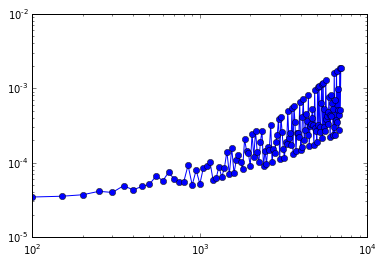

In [8]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

N = np.arange(100, 7000, 50)
T = []
for n in N:
    R = np.random.rand(n)
    t = timeit.Timer(lambda: np.fft.fft(R))
    T.append(min(t.repeat(20, 1)))
plt.xscale('log')
plt.yscale('log')
plt.plot(N, T, '-o')
plt.show()